In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import sklearn 

#### Let's see if we can find patterns comparing other variables among each other.

In [2]:
data = np.genfromtxt("../../data/data.dat")
data = np.delete(data, 0, 0)
df = pd.DataFrame(data, columns = ['ustat','alph1','alph2', 'beta', 'chi'])
df.head()

,ustat,alph1,alph2,beta,chi
0,8.408213,2.344511,2.344511,60.0,1.094479
1,7.006844,2.344511,2.344511,60.0,0.840347
2,5.255133,2.344511,2.344511,60.0,0.772829
3,3.503422,2.344511,2.344511,60.0,0.811944
4,2.102053,2.344511,2.344511,60.0,0.844523


<AxesSubplot:xlabel='ustat', ylabel='alph1'>

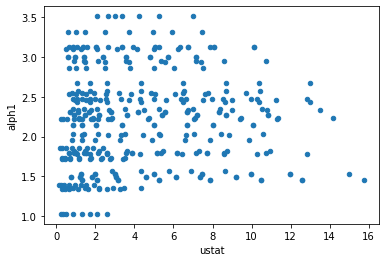

In [3]:
df.plot.scatter(x='ustat', y='alph1')

<AxesSubplot:xlabel='ustat', ylabel='alph2'>

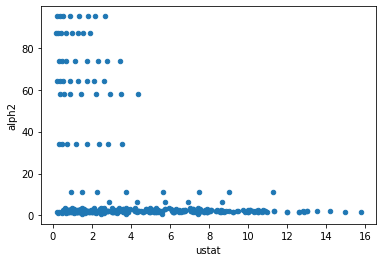

In [4]:
df.plot.scatter(x='ustat', y='alph2')

<AxesSubplot:xlabel='ustat', ylabel='beta'>

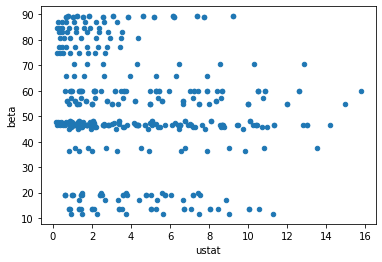

In [5]:
df.plot.scatter(x='ustat', y='beta')

There does not appear to be any patterns. There also does not appear to be a good way to cluster the data in any of the scatterplots. Except maybe clustering them by their relative x2-values?

#### Same scatterplots except this time let's use the same labeling used by Houston and group.

In [11]:
data = np.genfromtxt("../../data/data.dat")
data = np.delete(data, 0, 0)
df = pd.DataFrame(data, columns = ['ustat','alph1','alph2', 'beta', 'chi'])
df.head()

,ustat,alph1,alph2,beta,chi
0,8.408213,2.344511,2.344511,60.0,1.094479
1,7.006844,2.344511,2.344511,60.0,0.840347
2,5.255133,2.344511,2.344511,60.0,0.772829
3,3.503422,2.344511,2.344511,60.0,0.811944
4,2.102053,2.344511,2.344511,60.0,0.844523


In [12]:
# CHI

# small chi = 0
# large chi = 1
labels = []
for i in df['chi']:
    if i < 3:
        labels.append(0)
    else:
        labels.append(1)
        
df['chi'] = labels

In [14]:
colors = ['red', 'blue']

<AxesSubplot:xlabel='ustat', ylabel='alph1'>

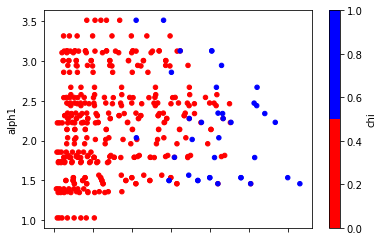

In [15]:
df.plot.scatter(x='ustat', y='alph1', c='chi', cmap=matplotlib.colors.ListedColormap(colors))

<AxesSubplot:xlabel='ustat', ylabel='alph2'>

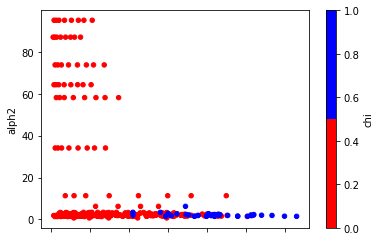

In [16]:
df.plot.scatter(x='ustat', y='alph2', c='chi', cmap=matplotlib.colors.ListedColormap(colors))

<AxesSubplot:xlabel='ustat', ylabel='beta'>

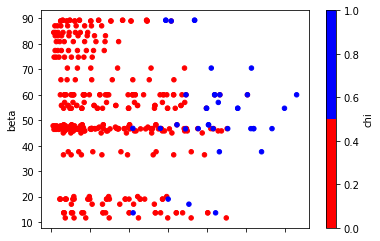

In [17]:
df.plot.scatter(x='ustat', y='beta', c='chi', cmap=matplotlib.colors.ListedColormap(colors))

Some visual observations I made:
1. Large chi appears in a wide range of alph1 and beta values, but not alph2 values. Large chi only appears when alph2 is closer to zero.
2. Following the above observation, large x2-values do not correspond to increased large-chi values.

#### Let's examine whether labels can be restructured using k-means clustering.

The K-means clustering algorithm computes centroids and repeats until the optimal centroid is found. It is presumptively known how many clusters there are. K-clusters for N instances.

In [18]:
data = np.genfromtxt("../../data/data.dat")
data = np.delete(data, 0, 0)
df = pd.DataFrame(data, columns = ['ustat','alph1','alph2', 'beta', 'chi'])
df.head()

,ustat,alph1,alph2,beta,chi
0,8.408213,2.344511,2.344511,60.0,1.094479
1,7.006844,2.344511,2.344511,60.0,0.840347
2,5.255133,2.344511,2.344511,60.0,0.772829
3,3.503422,2.344511,2.344511,60.0,0.811944
4,2.102053,2.344511,2.344511,60.0,0.844523


In [19]:
ustat_chi = df.iloc[:,[0,4]].values

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

In [24]:
X = ustat_chi
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

In [25]:
kmeans.cluster_centers_

array([[2.33877914, 0.83184532],
       [8.66781375, 3.23312814]])

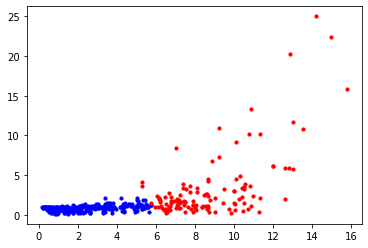

In [26]:
plt.scatter(ustat_chi[kmeans.labels_== 0,0], ustat_chi[kmeans.labels_ == 0,1], s = 10, c = 'blue')
plt.scatter(ustat_chi[kmeans.labels_== 1,0], ustat_chi[kmeans.labels_ == 1,1], s = 10, c = 'red')

With K=2, we see two separate clusters split near ustat = 5. We wanted to see whether there was any  